<a href="https://colab.research.google.com/github/sumyuck/ML-learning/blob/main/cvdl/CVDL_p_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

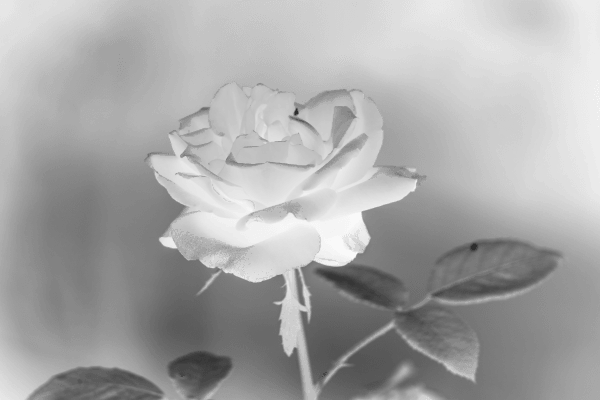

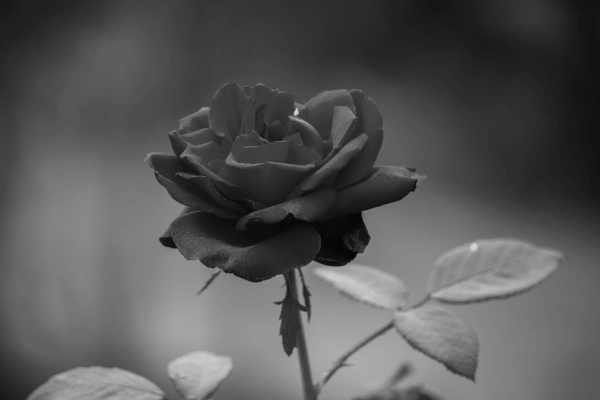

In [15]:
#Image Inversion
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

image_path = 'flower.webp'

def inverse(image):
    inverse_image = 255 - image
    return inverse_image

def process_image(image_path):
    inverse_image = inverse(image_path)
    return inverse_image

if os.path.exists(image_path):
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if original_image is not None:
        processed_image = process_image(original_image)
        cv2_imshow(processed_image)
        cv2_imshow(original_image)

    else:
        print(f"Failed to read image at {image_path}")
else:
    print(f"File not found: {image_path}")

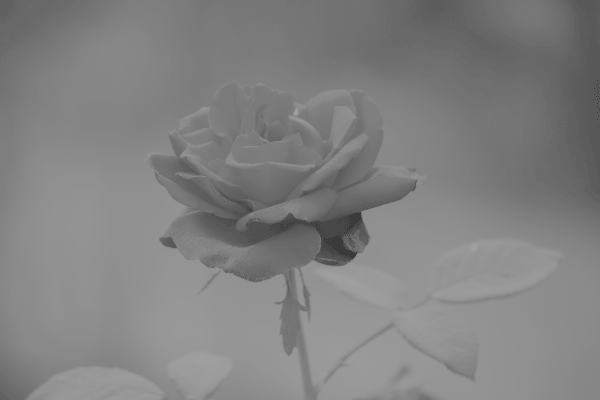

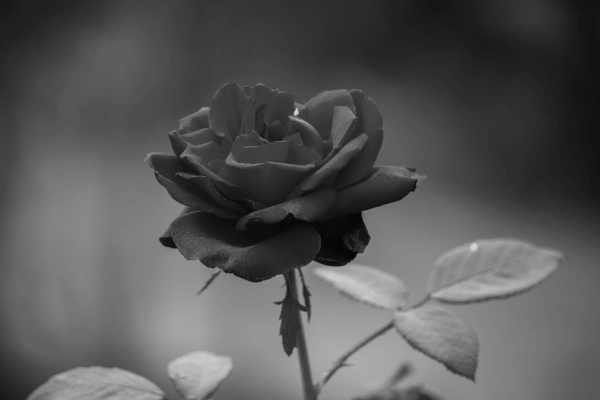

In [25]:
#Log Transformation
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

image_path = 'flower.webp'

def log_transform(image):
    normalized_image = image.astype(np.float32)

    c = 30
    log_image = c * np.log(1 + normalized_image)

    # log_image /= np.max(log_image)

    # log_image = np.uint8(log_image * 255.0)

    return log_image

def process_image(image_path):
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if original_image is not None:
        processed_image = log_transform(original_image)
        cv2_imshow(processed_image)
        cv2_imshow(original_image)
    else:
        print(f"Failed to read image at {image_path}")


if os.path.exists(image_path):
    process_image(image_path)
else:
    print(f"File not found: {image_path}")

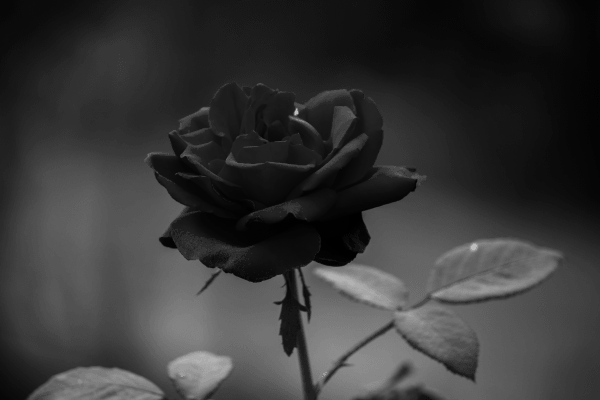

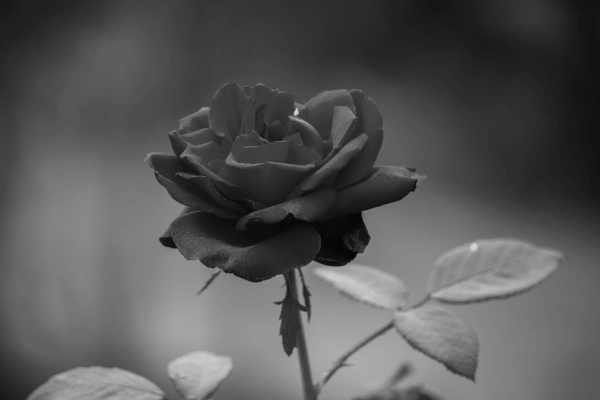

In [31]:
#Gamma Tranformation
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

image_path = 'flower.webp'

def gamma_transform(image, gamma):
    normalized_image = image.astype(np.float32) / 255.0

    gamma_image = np.power(normalized_image, gamma)

    gamma_image = np.uint8(gamma_image * 255.0)

    # c = 20
    # gamma_image = c*gamma_image

    return gamma_image

def process_image(image_path, gamma):
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if original_image is not None:
        processed_image = gamma_transform(original_image, gamma)
        cv2_imshow(processed_image)
        cv2_imshow(original_image)
    else:
        print(f"Failed to read image at {image_path}")


if os.path.exists(image_path):
    gamma_value = 1.5
    process_image(image_path, gamma_value)
else:
    print(f"File not found: {image_path}")

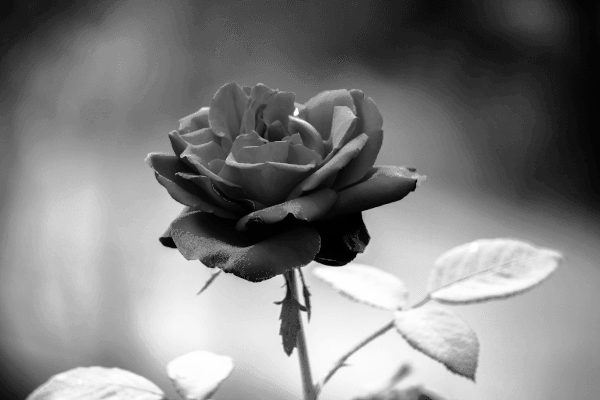

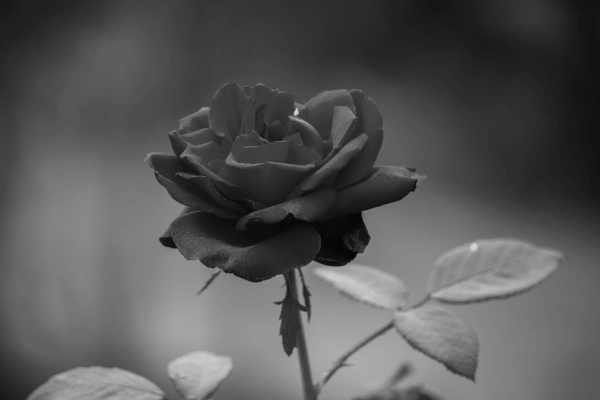

In [32]:
#Histogram Transformation
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

image_path = 'flower.webp'

def histogram_transform(image):
    normalized_image = image.astype(np.float32)

    hist = np.zeros(256, dtype=int)
    rows, cols = normalized_image.shape
    for i in range(rows):
        for j in range(cols):
            pixel_value = int(normalized_image[i, j])
            hist[pixel_value] += 1

    pdf = hist / normalized_image.size

    cdf = pdf.cumsum()

    cdf_normalized = cdf * 255

    histogram_image = np.zeros_like(normalized_image, dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            original_pixel_value = int(normalized_image[i, j])
            histogram_image[i, j] = int(cdf_normalized[original_pixel_value])

    return histogram_image

def process_image(image_path):
    processed_image = histogram_transform(image_path)
    return processed_image

if os.path.exists(image_path):
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if original_image is not None:
        processed_image = process_image(original_image)
        cv2_imshow(processed_image)
        cv2_imshow(original_image)

    else:
        print(f"Failed to read image at {image_path}")
else:
    print(f"File not found: {image_path}")